# Estimación de F (modelos no paramétricos)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Función de distribución empírica

La función de distribución empírica para una muestra $X_1,...,X_n \sim F $ se define  $$\hat{F_n}(x) = \frac{1}{n} \sum_{i=1}^{n}I(X_i\leq x) $$

Es decir, le aplica PMF $ p_{X_i}(x) = p(X_i=x) = \frac{1}{n}$ a cada $X_i$

In [15]:
x_ejemplo = [3, 1, 2, 6, 2]

¿Que seria $\hat F_n(1)$?  ¿Que seria $\hat F_n(2)$?

In [16]:
#Defino la distribución empírica F_hat
F_hat_ejemplo = stats.ecdf(x_ejemplo)

In [17]:
type(F_hat_ejemplo)

scipy.stats._survival.ECDFResult

In [18]:
print(F_hat_ejemplo.cdf.quantiles) #los valores ordenados de los datos

[1. 2. 3. 6.]


In [19]:
print(F_hat_ejemplo.cdf.probabilities)

[0.2 0.6 0.8 1. ]


In [20]:
print(F_hat_ejemplo.cdf.evaluate(4.0))

0.8


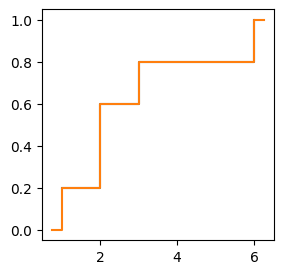

In [21]:
x_ordenados = F_hat_ejemplo.cdf.quantiles
F_probabilidades = F_hat_ejemplo.cdf.probabilities

plt.figure(figsize=(3, 3))
ax = plt.subplot()
ax.step(x_ordenados,F_probabilidades,where='post')
F_hat_ejemplo.cdf.plot(ax)

### Importo datos

Busco $n=100$ datos para estimar la distribución subyacente. Para el ejemplo voy a sacarlos de [este repositorio](https://www.kaggle.com/datasets/tentotheminus9/gravity-spy-gravitational-waves) pero pueden probar con cualquier dataset. En este caso son muestras de tiempos de duración de glitches encontrados en mediciones de LIGO.

In [22]:
!pip install gdown

# Download the file using gdown
!gdown 1BYjpp3wR3QcGS00ZA-i2-eQk69N1yYNC

Downloading...
From: https://drive.google.com/uc?id=1BYjpp3wR3QcGS00ZA-i2-eQk69N1yYNC
To: /content/trainingset_v1d1_metadata.csv
100% 5.37M/5.37M [00:00<00:00, 147MB/s]


In [23]:
datos = pd.read_csv('trainingset_v1d1_metadata.csv', delimiter=',')
datos.head()

,event_time,ifo,peak_time,peak_time_ns,start_time,start_time_ns,duration,search,process_id,event_id,...,chisq_dof,param_one_name,param_one_value,gravityspy_id,label,sample_type,url1,url2,url3,url4
0,1.134216e+09,L1,1134216192,931639909,1134216192,832031011,0.18750,Omicron,0,21,...,0,phase,-2.72902,zmIdpucyOG,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
1,1.129360e+09,L1,1129359781,558593034,1129359781,47851085,0.94238,Omicron,0,107,...,0,phase,1.10682,zWFRqqDxwv,Whistle,test,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
2,1.127425e+09,L1,1127425468,976317882,1127425468,960937023,0.04688,Omicron,0,218,...,0,phase,-0.83099,zKCTakFVcf,Whistle,train,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
3,1.132637e+09,L1,1132636755,365233898,1132636754,951172113,0.82422,Omicron,0,88,...,0,phase,0.76242,z14BdoiFZS,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...
4,1.132036e+09,L1,1132035853,197264909,1132035852,933837890,2.00366,Omicron,0,16,...,0,phase,-0.31161,yyjqLCtAmO,Whistle,validation,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...,https://panoptes-uploads.zooniverse.org/produc...


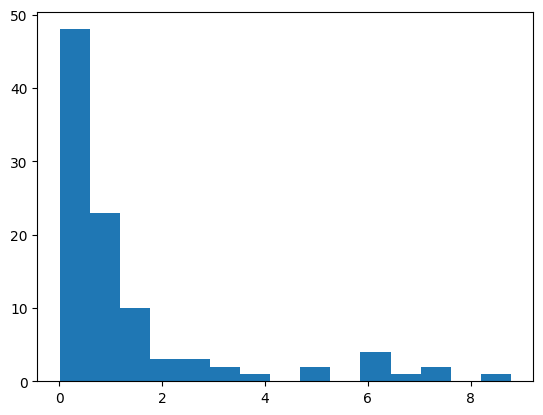

In [24]:
#Importo una muestra cualquiera
n = 100
sample_data = datos['duration'].sample(n=n)
sample = sample_data.values
plt.hist(sample,bins='auto')
plt.show()

In [25]:
#Defino la distribución empírica F_hat
F_hat = stats.ecdf(sample)

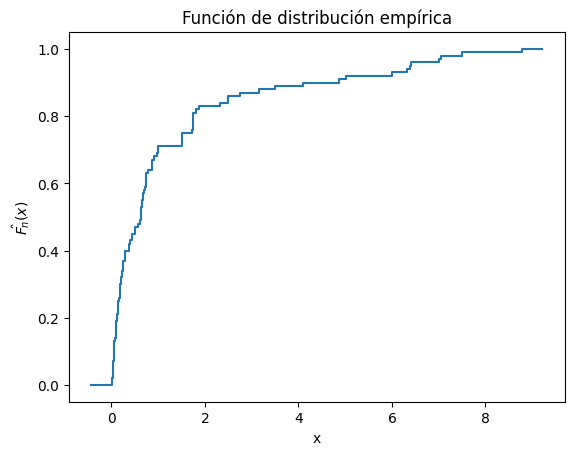

In [26]:
#Defino la distribución empírica F_hat
F_hat = stats.ecdf(sample)

#Para trabajar con la CDF invocamos al atributo cdf y graficamos
ax = plt.subplot()
F_hat.cdf.plot(ax)
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.show()

In [27]:
#F_hat.cdf tiene, a su vez, dos atributos:
x = F_hat.cdf.quantiles #array con los (X_1,...,X_n) de la muestra ordenados de menor a mayor

In [30]:
x

array([0.01172   , 0.01563   , 0.02344   , 0.03125   , 0.03516   ,
       0.03906   , 0.05469   , 0.0625    , 0.07812   , 0.09375   ,
       0.10156   , 0.10938   , 0.12341   , 0.13477001, 0.14061999,
       0.14844   , 0.15039   , 0.17188001, 0.1875    , 0.19922   ,
       0.20801   , 0.21875   , 0.23438001, 0.25      , 0.28125   ,
       0.29003999, 0.37061   , 0.375     , 0.39061999, 0.4375    ,
       0.5       , 0.5625    , 0.61035001, 0.625     , 0.64453   ,
       0.65625   , 0.67346001, 0.67919999, 0.6875    , 0.70850003,
       0.75      , 0.78125   , 0.875     , 0.90723002, 0.97656   ,
       1.        , 1.5       , 1.72070003, 1.75      , 1.80859005,
       1.875     , 2.33203006, 2.5       , 2.75      , 3.15820003,
       3.5       , 4.09375   , 4.875     , 5.02539015, 6.00487995,
       6.32372999, 6.38672018, 6.41016006, 7.        , 7.0527401 ,
       7.49218988, 8.77880955])

In [29]:
len(x)

67

In [31]:
F = F_hat.cdf.probabilities #array con la CDF para cada valor correspondiente de x
F

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.09, 0.13, 0.14, 0.18, 0.19,
       0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.37, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.45, 0.47, 0.48, 0.49,
       0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.63, 0.64, 0.67, 0.68,
       0.69, 0.71, 0.75, 0.76, 0.81, 0.82, 0.83, 0.84, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [32]:
F_hat.cdf.evaluate(6.0)

array(0.92)

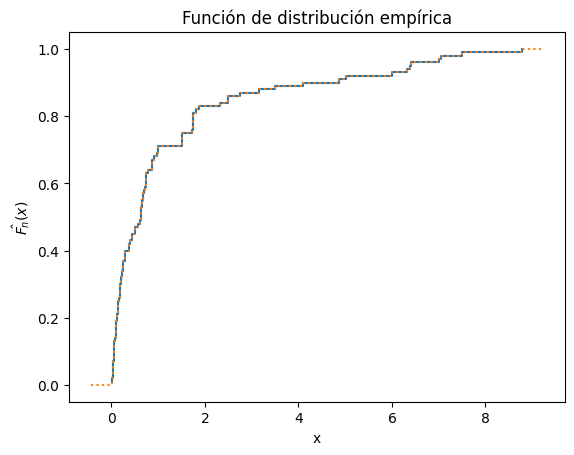

In [33]:
ax = plt.subplot()
ax.step(x,F,where='post') #manuealmente
F_hat.cdf.plot(ax,ls=':') #automaticamente

ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.show()

In [34]:
#Para evaluar F_hat en un valor arbitrario de x podemos usar el método evaluate(x)
F_hat.cdf.evaluate(2.0)

array(0.83)

### Funcionales estadísticos

Llamamos $T(F)$ a un funcional estadístico de una distribución $F$. Es cualquier cantidad que se pueda calcular como función de $F$ (ej: promedio, varianza, cuantiles, etc.)

Para obtener estimar cualquier $T(F)$ podemos usar el estimador "plug-in", que es simplemente reemplazar $F$ con $\hat{F_n}$.

Por ejemplo, la media de una variable aleatoria $X \sim F$ es

$$ \mu = E(X) =  \sum_{x}x p_X(x) \hspace{1cm} \text{(caso discreto)}$$
$$ \mu = E(X) =  \int x f_X(x)dx \hspace{1cm} \text{(caso continuo)} $$

Entonces, el estimador plug-in de $\mu$ será
$$\hat{\mu} = \frac{1}{n}\sum_{i=1}^{n}X_i$$

es decir, el promedio muestral.

Resumidamente, podemos estimar cualquier funcional estadístico por su contraparte muestral.

In [35]:
#algunas características muestrales

mean = np.mean(sample)     # promedio
var = np.var(sample)       # varianza
std = np.std(sample)       # desvío estándar (sqrt(var))
median = np.median(sample) # mediana
quantile = np.quantile(sample,q = 0.25) # cuantiles

print('media =',mean)
print('mediana =',median)
print('std =',std)
print('25-cuartil =',quantile)

media = 1.3266262008063494
mediana = 0.625
std = 1.9433207452602799
25-cuartil = 0.16650750488042826


In [36]:
#asimetría: si es negativa, tiene una cola más larga a la izquierda; positiva, a la derecha
skewness = stats.skew(sample)

#correlación
sample_id = sample_data.index
sample_2 = datos.loc[sample_id, 'amplitude'].values
correlation = stats.pearsonr(sample,sample_2).statistic

print('asimetría = ',skewness)
print('correlación con Y:amplitud =',correlation)

asimetría =  2.136587600912707
correlación con Y:amplitud = 0.618946635785953


### Intervalos de confianza

Podemos construír un intervalo de confianza de nivel $1-\alpha$ para $F$ donde los bordes inferiores y superiores $L(x)$ y $U(x)$ son:
$$ L(x) = \max(\hat{F_n}(x)-\epsilon_n,0)$$
$$ U(x) = \min(\hat{F_n}(x)+\epsilon_n,1)$$

con $ \epsilon_n = \sqrt{\frac{1}{2n}\log(\frac{2}{\alpha})} $

Con estos valores, $P(L(x)\leq F(x) \leq U(x) )\geq 1-\alpha$ para cualquier $F$.

**$\hat{F_n}(x)$ es la función de distribución acumulada empírica**

In [37]:
def confidence_interval_dkw(ecdf,alpha=0.05):
  L = []
  U = []
  n = len(ecdf.probabilities)
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
    U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
    L.append(L_i)
    U.append(U_i)
  return L,U

low,up = confidence_interval_dkw(F_hat.cdf,alpha=0.05)

In [39]:
len(low)

67

Text(0.5, 1.0, 'Función de distribución empírica')

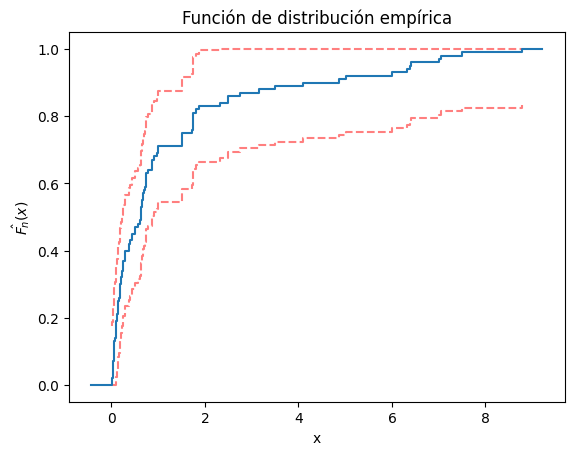

In [40]:
ax = plt.subplot()
ax.step(x,low,'r--',alpha=0.5,where='post')
ax.step(x,up,'r--',alpha=0.5,where='post')
F_hat.cdf.plot(ax)
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')

### Ejemplo con F~N(0,1)

Empecemos generando una muestra aleatoria $$X_1,...,X_{100} \sim \mathcal{N}(0,1) $$

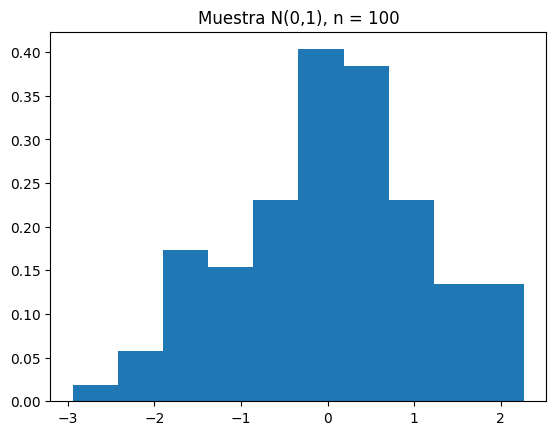

In [44]:
mu = 0
sigma = 1
n = 100

norm_sample = stats.norm.rvs(size=n,loc=mu,scale=sigma)

plt.hist(norm_sample, density=True, bins='auto')
plt.title('Muestra N(0,1), n = {}'.format(n))
plt.show()

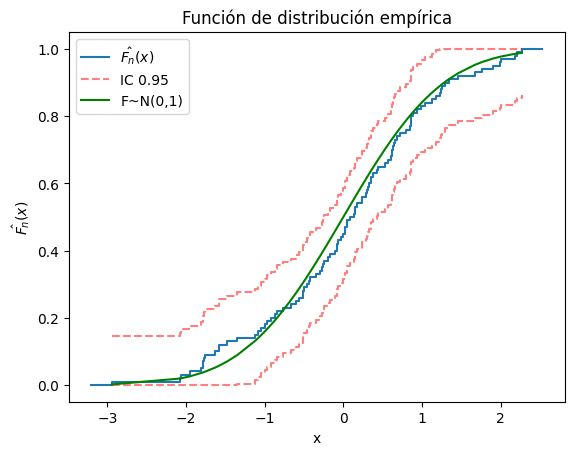

In [45]:
#norm_sample = stats.norm.rvs(size=n,loc=mu,scale=sigma)
F_hat = stats.ecdf(norm_sample)
x = F_hat.cdf.quantiles
F = F_hat.cdf.probabilities

alpha = 0.05  #0.5
low,up = confidence_interval_dkw(F_hat.cdf,alpha=alpha)


ax = plt.subplot()
F_hat.cdf.plot(ax,label=r'$\hat{F_n}(x)$')
ax.step(x,low,'r--',alpha=0.5,where='post',label='IC {}'.format(1-alpha))
ax.step(x,up,'r--',alpha=0.5,where='post')
ax.plot(x,stats.norm.cdf(x),color='g',label='F~N(0,1)')
ax.set_xlabel('x')
ax.set_ylabel(r'$\hat{F_n}(x)$')
plt.title('Función de distribución empírica')
plt.legend()

### Ejercicio
Repetir el experimento 1000 veces con un IC de nivel 0.95 y registrar en cuántos casos el intervalo de confianza contiene **completamente** la función de distribución verdadera.

In [ ]:
#ejercicio

### Error y desvío estándar de $\hat{\mu}$
Particularmente para el estimador del promedio $\hat{\mu} = \bar{X_n}$ podemos calcular su desvío estándar, ya que es el error estándar del promedio muestral.

$$\text{se}(\hat{\mu}) = \sqrt{\text{var}(\bar{X_n})} = \frac{\sigma}{\sqrt{n}} $$

donde $\sigma$ es el desvío estándar de $X\sim F$.

Por lo tanto, para estimar $\text{se}(\hat{\mu})$, reemplazamos $\sigma$ por $\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X_n})^{2}}$, el desvío estándar muestral.

También podemos estimar un intervalo de confianza de nivel $1-\alpha$ para $\hat{\mu}$ como
$$\hat{\text{IC}}(\hat{\mu}) = \hat{\mu} \pm z_{\frac{\alpha}{2}}\hat{\text{se}} $$

In [47]:
mean = np.mean(sample)
se_mean = std/np.sqrt(n)

alpha = 0.05
low = mean - stats.norm.ppf(1-alpha/2)*se_mean
up = mean + stats.norm.ppf(1-alpha/2)*se_mean

print('promedio =',mean)
print('error estándar del promedio =',se_mean)
print('IC = ',[low,up])

promedio = 1.3266262008063494
error estándar del promedio = 0.35480020288226866
IC =  [np.float64(0.6312305814495985), np.float64(2.0220218201631)]


### Ejercicio comparación de dos muestras

Tenemos muestras de tamaños de cráneos masculinos encontrados en Egipto que corresponden a dos épocas distintas. Los datos vienen de [este repositorio](https://dasl.datadescription.com/datafile/egyptians/?_sfm_methods=Comparing+Groups&_sfm_cases=4+59943).

Queremos saber si la media de los cráneos es la misma o cambió de una época a la otra. Para eso, hallar un estimador de $\theta = \mu_1-\mu_2$ y proporcionar un error estándar y un interavalo de confianza para este estimador. Decidir si son distintos o no

Text(0.5, 0, 'Tamaño de cráneos')

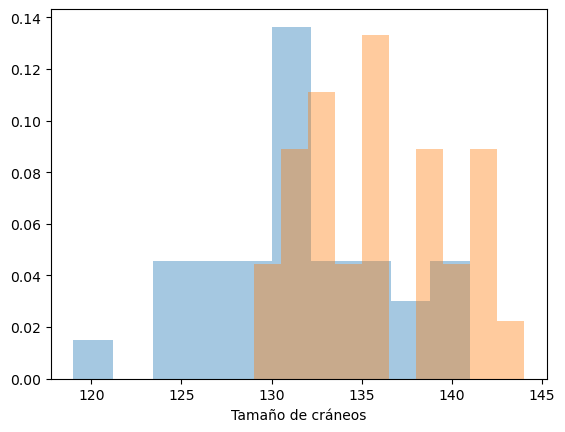